CG MSM from "primitive clustering" along rama-plot
====

In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator

Read in the dtrajs
------

In [4]:
indir = '/data/isilon/rudzinski/cluster_tmp/AAQAA/AAQAA_hybrid_AMBER_Go/wDB-HP_inter/NC_CA/2016_10_21/epsNC-11/epsNC-11_epsdb-0.3epsNC_epshp-0.25epsNC/T-240/MSM_analysis/'

dtraj_rama = np.load(indir+'BMSM/dtraj/traj_rama.npy')


In [5]:
Nrama = dtraj_rama.shape[0]
Ntraj = dtraj_rama.shape[1]
Nfr = dtraj_rama.shape[2]
Ndih = dtraj_rama.shape[3]

In [6]:
Aconv = np.pi/180.
dtraj_dih = []
for traj in range(Ntraj):
    dtraj_dih.append([])
    dih = 0
    dtraj_dih[traj].append(np.cos(Aconv*dtraj_rama[0,traj,:,dih]))
    dtraj_dih[traj] = np.vstack( (dtraj_dih[traj],np.sin(Aconv*dtraj_rama[0,traj,:,dih])) )
    for rama in range(1,Nrama):
        dtraj_dih[traj] = np.vstack( (dtraj_dih[traj],np.cos(Aconv*dtraj_rama[rama,traj,:,dih])) )
        dtraj_dih[traj] = np.vstack( (dtraj_dih[traj],np.sin(Aconv*dtraj_rama[rama,traj,:,dih])) )
    #
    dih = 1
    for rama in range(0,Nrama):
        dtraj_dih[traj] = np.vstack( (dtraj_dih[traj],np.cos(Aconv*dtraj_rama[rama,traj,:,dih])) )
        dtraj_dih[traj] = np.vstack( (dtraj_dih[traj],np.sin(Aconv*dtraj_rama[rama,traj,:,dih])) )

In [7]:
for traj in range(Ntraj):
    dtraj_dih[traj] = dtraj_dih[traj].T

In [8]:
dtraj_dih[0].shape
tica_lag = 20

In [9]:
tica_obj = coor.tica(dtraj_dih, lag=tica_lag, dim=-1, var_cutoff=0.95,stride=1, mean=None)

In [10]:
Y = tica_obj.get_output()

In [11]:
print Y[0].shape

(200001, 27)


In [12]:
Nprune = np.load('Nprune.npy')
Y_prune = []
for traj in range(len(Y)):
    Y_prune.append( Y[traj][::Nprune] )

In [13]:
R = [0.]
dtraj_DPCA = []
for rad in R:
    #dtraj_DPCA.append( np.genfromtxt('R'+str(rad)+'/microstates') )
    dtraj_DPCA.append( np.genfromtxt('microstates') )

In [14]:
state_pos_x = []
state_pos_y = []
for rad_ind in range(len(R)):
    state_pos_x.append([])
    state_pos_y.append([])
    for state in np.unique(dtraj_DPCA[rad_ind]):
        state_frames = np.where(dtraj_DPCA[rad_ind]==state)[0]
        state_pos_x[rad_ind].append( np.mean( np.concatenate(Y_prune)[:,0][state_frames] ) )
        state_pos_y[rad_ind].append( np.mean( np.concatenate(Y_prune)[:,1][state_frames] ) )

In [15]:
for rad_ind in range(len(R)):
    print np.unique(dtraj_DPCA[rad_ind]).shape

(86,)


In [16]:
print dtraj_DPCA[0].shape

(4000040,)


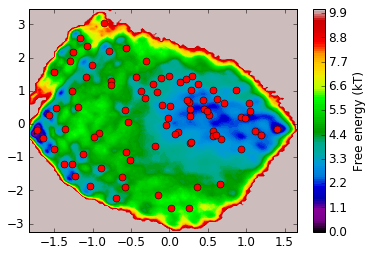

In [17]:
for rad_ind in range(len(R)):

    fig, ax = mplt.plot_free_energy(np.vstack(Y_prune)[:,0], np.vstack(Y_prune)[:,1])
    for state in range(len(np.unique(dtraj_DPCA[rad_ind]))):
        plot(state_pos_x[rad_ind][state],state_pos_y[rad_ind][state], linewidth=0, marker='o', markersize=7, color='red') #, markerfacecolor='none')
    plt.show()

dimy = 2


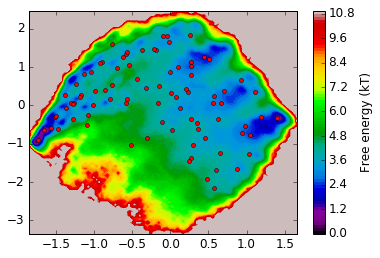

dimy = 3


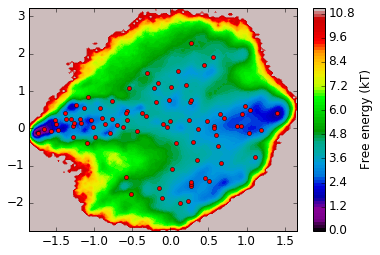

dimy = 4


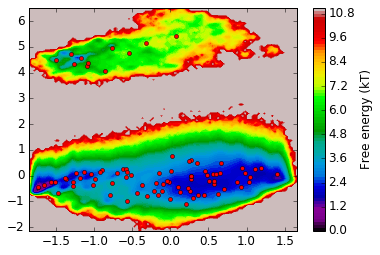

dimy = 5


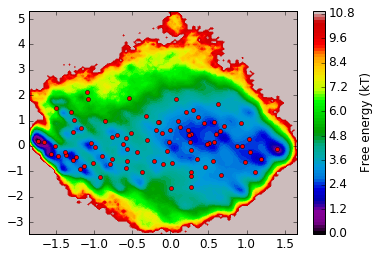

In [18]:
dim0 = 0
dimy = [2,3,4,5]

for dim1 in dimy:
    print 'dimy = '+str(dim1)
    state_pos_x = []
    state_pos_y = []
    for rad_ind in range(len(R)):
        state_pos_x.append([])
        state_pos_y.append([])
        for state in np.unique(dtraj_DPCA[rad_ind]):
            state_frames = np.where(dtraj_DPCA[rad_ind]==state)[0]
            state_pos_x[rad_ind].append( np.mean( np.concatenate(Y_prune)[:,dim0][state_frames] ) )
            state_pos_y[rad_ind].append( np.mean( np.concatenate(Y_prune)[:,dim1][state_frames] ) )

        fig, ax = mplt.plot_free_energy(np.vstack(Y)[:,dim0], np.vstack(Y)[:,dim1])
        for state in range(len(np.unique(dtraj_DPCA[rad_ind]))):
            plot(state_pos_x[rad_ind][state],state_pos_y[rad_ind][state], linewidth=0, marker='o', markersize=4, color='red') #, markerfacecolor='none')
        plt.show()